### EDA TASK
Jakub Jęsiek 160312

Konstantin Laurysiuk 161181

Jakub Radziejewski 160148


In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

In [276]:
# Set style for visualizations
sns.set(style="whitegrid")

In [277]:
# Load the dataset into a Pandas DataFrame.

path = kagglehub.dataset_download("jayaantanaath/student-habits-vs-academic-performance")
print("Path to dataset files:", path)
file_path = os.path.join(path, "student_habits_performance.csv")
df = pd.read_csv(file_path)

Path to dataset files: C:\Users\Jakub\.cache\kagglehub\datasets\jayaantanaath\student-habits-vs-academic-performance\versions\1


In [278]:
# Display the first 5 rows
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [279]:
# Check the number of rows and columns.
print("Dataset Shape:", df.shape)

Dataset Shape: (1000, 16)


In [280]:
# Check column names
print("Columns:", df.columns)

Columns: Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')


In [281]:
# Display data types of each column
print("Data Types:\n", df.dtypes)

Data Types:
 student_id                        object
age                                int64
gender                            object
study_hours_per_day              float64
social_media_hours               float64
netflix_hours                    float64
part_time_job                     object
attendance_percentage            float64
sleep_hours                      float64
diet_quality                      object
exercise_frequency                 int64
parental_education_level          object
internet_quality                  object
mental_health_rating               int64
extracurricular_participation     object
exam_score                       float64
dtype: object


In [282]:
# student_id is probably unique (even doesn't have to) and can work nice as an index of DataFrame
print(df['student_id'].is_unique)

True


In [283]:
df.set_index('student_id',inplace=True)

# Display the first 5 rows one more time
df.head(5)

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
student_id,,,,,,,,,,,,,,,
S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [284]:
# Summary statistics for numeric columns
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [285]:
# Summary statistics for not numeric columns
df.describe(include=['object', 'category', 'bool'])

,gender,part_time_job,diet_quality,parental_education_level,internet_quality,extracurricular_participation
count,1000,1000,1000,909,1000,1000
unique,3,2,3,3,3,2
top,Female,No,Fair,High School,Good,No
freq,481,785,437,392,447,682


In [286]:
# Check for missing values in each column
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64


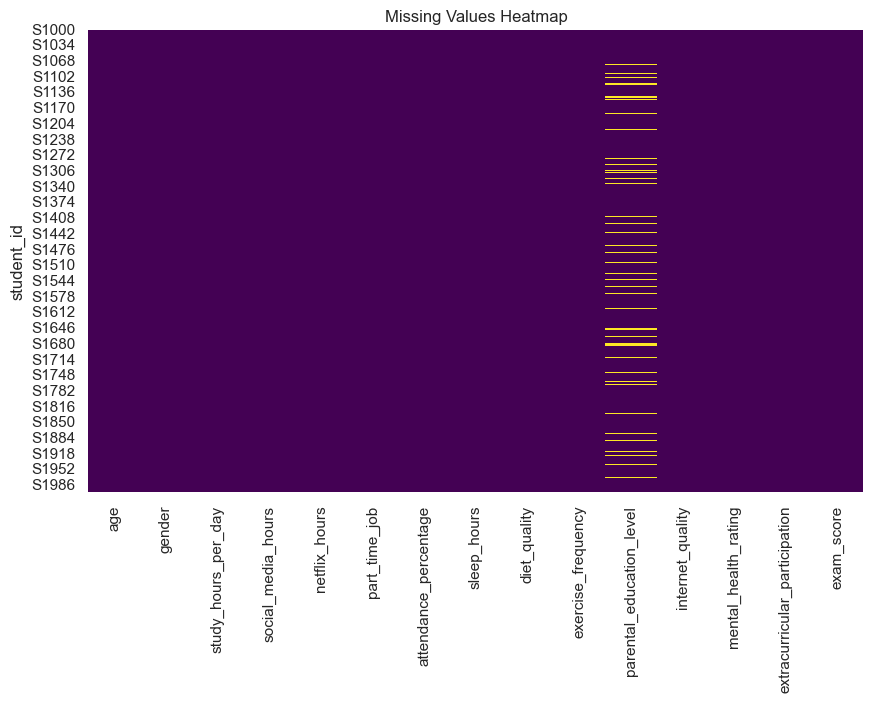

In [287]:
# Visualize missing data using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [288]:
#Fill categorical columns with mode
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\Jakub\AppData\Local\Temp\ipykernel_26068\922785356.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [289]:
# Verify no missing values remain
print("Missing Values After Handling:\n", df.isnull().sum())

Missing Values After Handling:
 age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64


In [290]:
df.drop_duplicates(inplace=True)
print("Dataset Shape After Removing Duplicates:", df.shape)
# There were no duplicates

Dataset Shape After Removing Duplicates: (1000, 15)


In [291]:
# Create df of numerical columns only
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
student_id,,,,,,,,,
S1000,23,0.0,1.2,1.1,85.0,8.0,6,8,56.2
S1001,20,6.9,2.8,2.3,97.3,4.6,6,8,100.0
S1002,21,1.4,3.1,1.3,94.8,8.0,1,1,34.3
S1003,23,1.0,3.9,1.0,71.0,9.2,4,1,26.8
S1004,19,5.0,4.4,0.5,90.9,4.9,3,1,66.4


Text(0.5, 1.02, 'Numeric Feature Distributions with KDE')

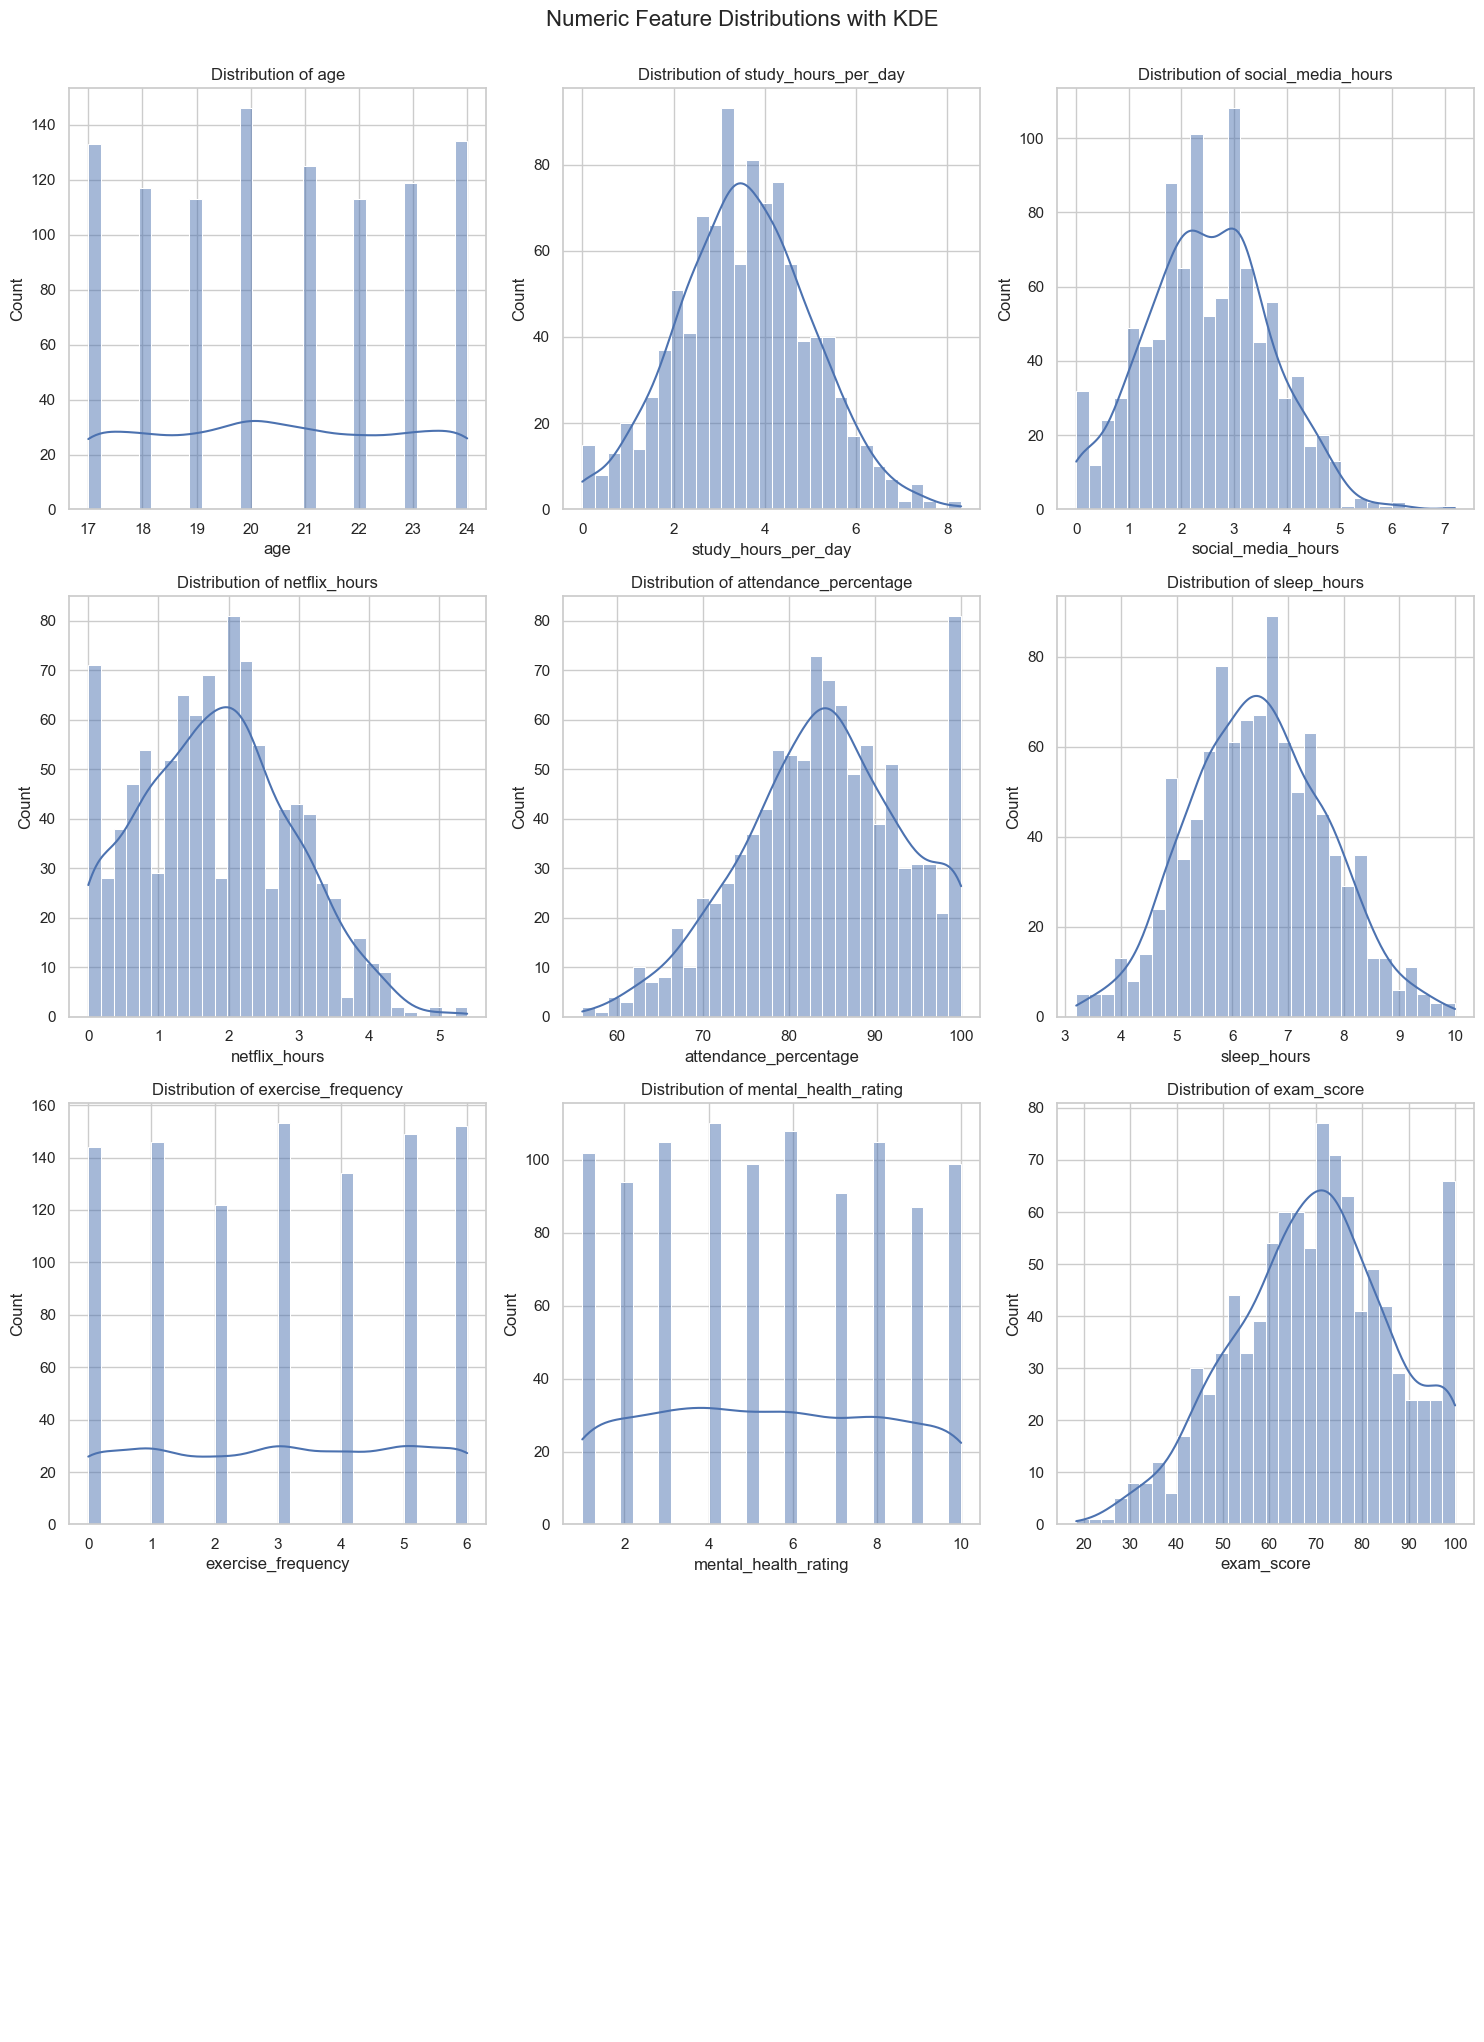

In [292]:
# Checking the distributions of numerical attributes
numeric_columns = df.select_dtypes(include='number').columns

num_cols = 3
num_rows_hist = (len(numeric_columns) // num_cols) + 1
num_rows_box = (len(numeric_columns) // num_cols) + 1
fig, axes = plt.subplots(num_rows_hist, num_cols, figsize=(15, 5 * num_rows_hist))
axes_hist = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], kde=True, bins=30, ax=axes_hist[i])
    axes_hist[i].set_title(f"Distribution of {col}")

for j in range(i + 1, len(axes_hist)):
    axes_hist[j].axis('off')

plt.tight_layout()
plt.suptitle("Numeric Feature Distributions with KDE", fontsize=16, y=1.02)


Some charts looks strange:
* about 7% of students don't watch Netflix which distorts the normal distribution
* about 8% of students were present during all classes which also distorts the normal distribution
* number of people with the highest exam score distorts the normal distribution
* the 3 consecutive bins with low exam scores just look strange (also the case with sleep hours)

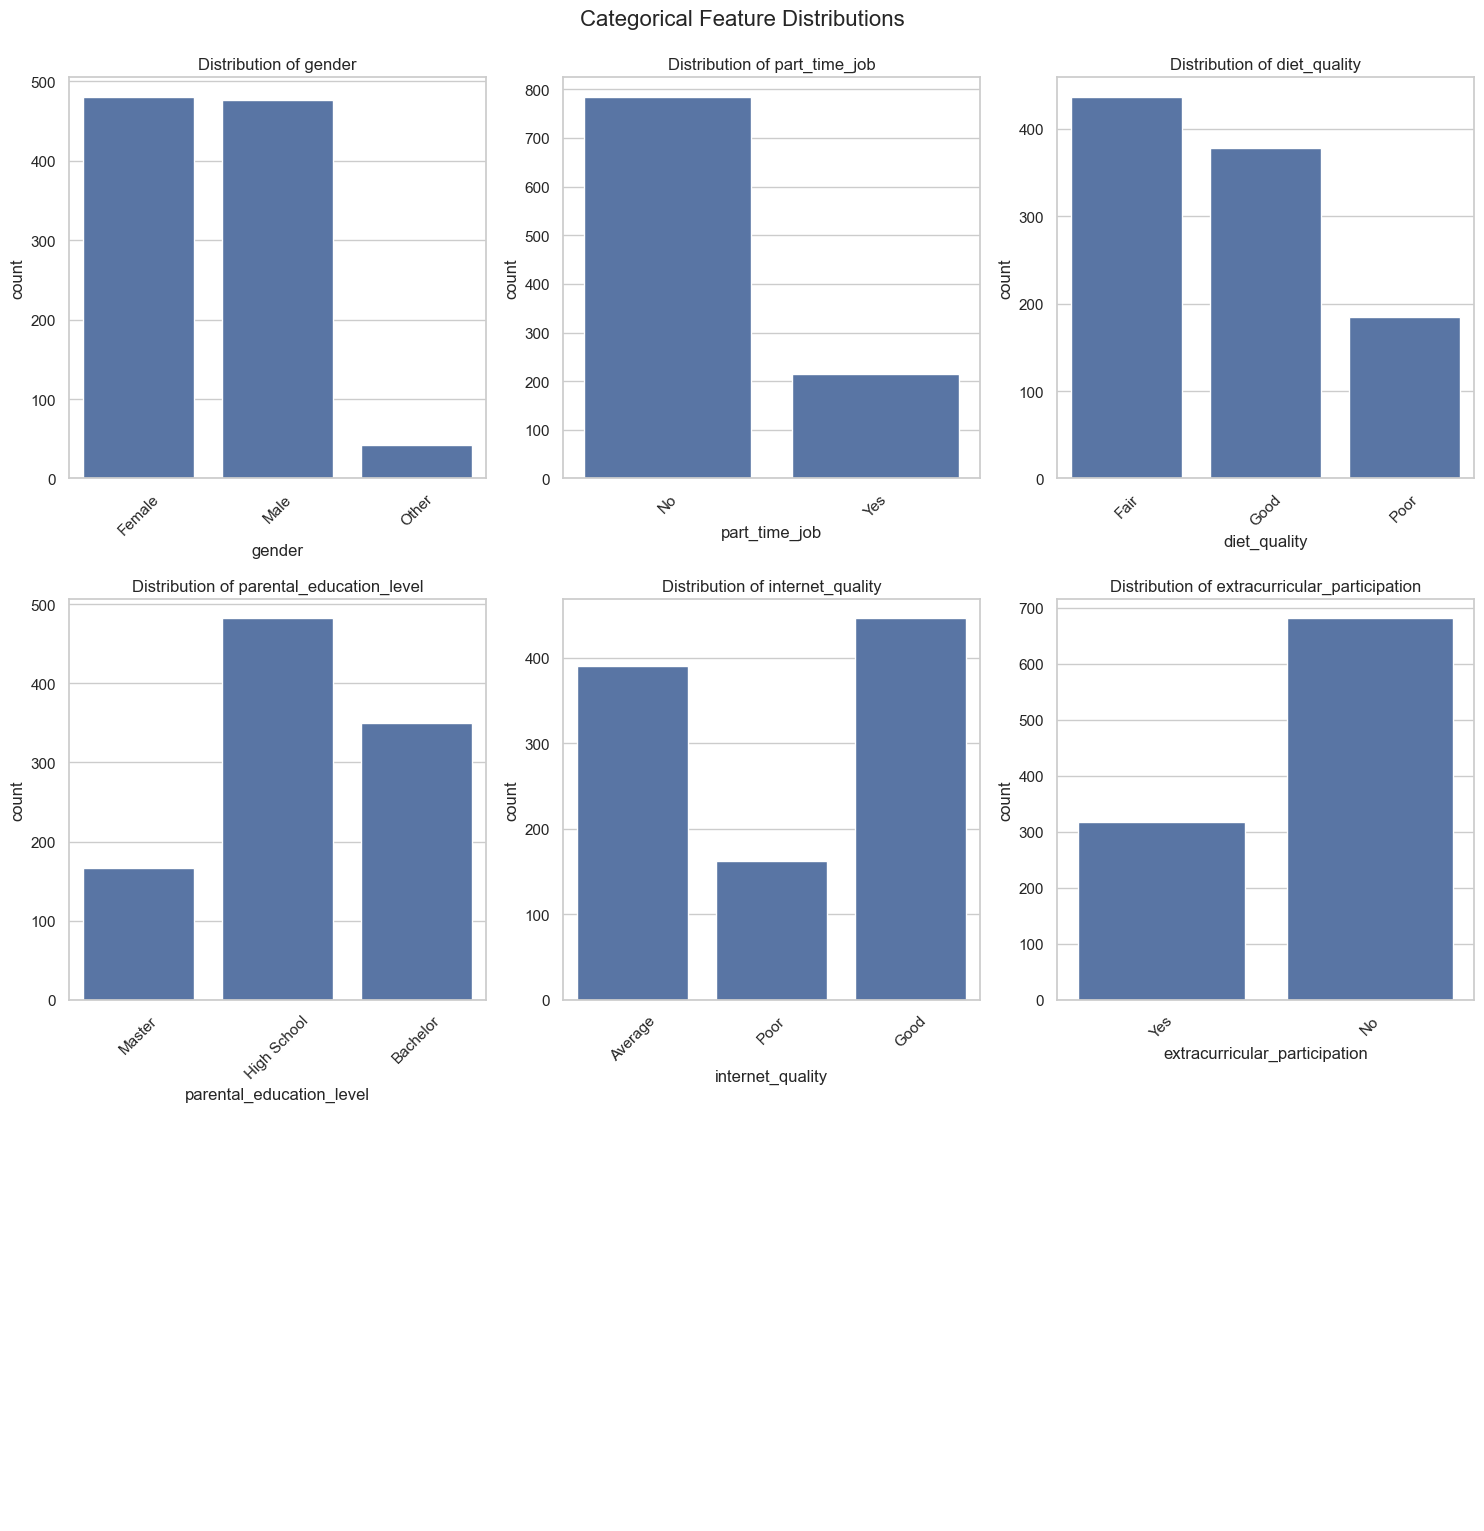

In [293]:
# Checking the distributions of categorical attributes
categorical_columns = df.select_dtypes(include='object').columns

num_cols = 3
num_rows = (len(categorical_columns) // num_cols) + 1
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.suptitle("Categorical Feature Distributions", fontsize=16, y=1.02)
plt.show()

# parental_level is distorted as we replaced all null values with "High School"

**From now on, we focused mostly on correlation of other attributes with exam_score (when analyzing the dependencies between 2 attributes) as the whole dataset tries to examine if some human habits have influence on exam scores of students**

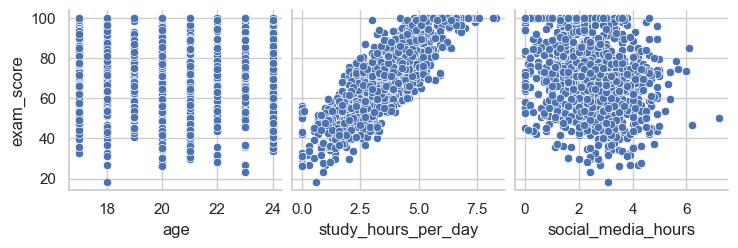

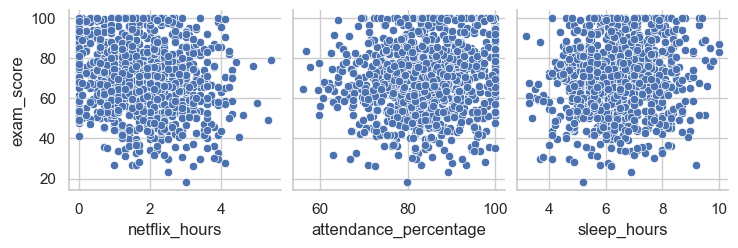

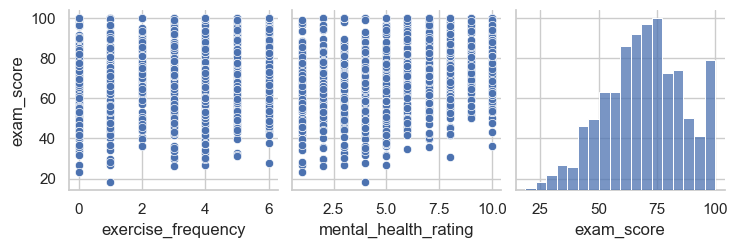

In [294]:
for i in range(0, len(df_num.columns), 3):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+3],
                y_vars=['exam_score'])

From the charts, we can easily notice a strong corelation between study hours and exam scores.
We can also see that some other attributes (social_media_hours, attendance_percentage, social_media_hours, netflix_hours, mental_health_rating) are also correlated with exam_score but it is a weak relationship.

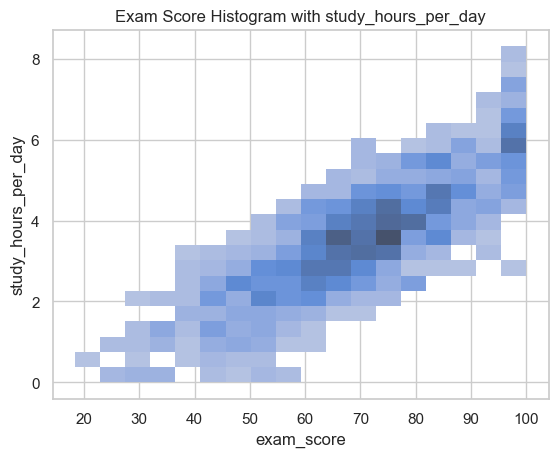

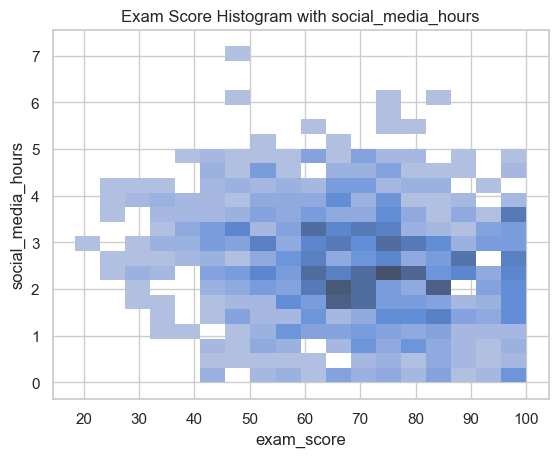

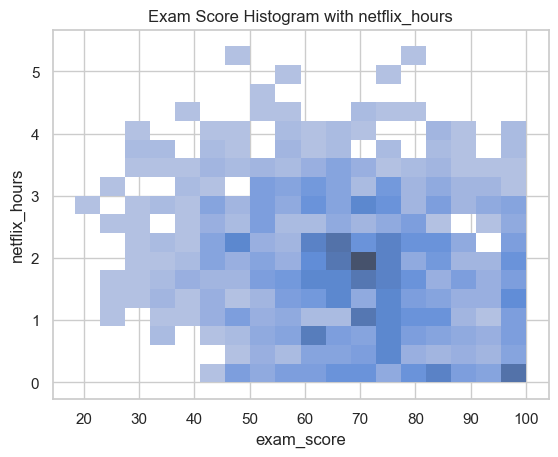

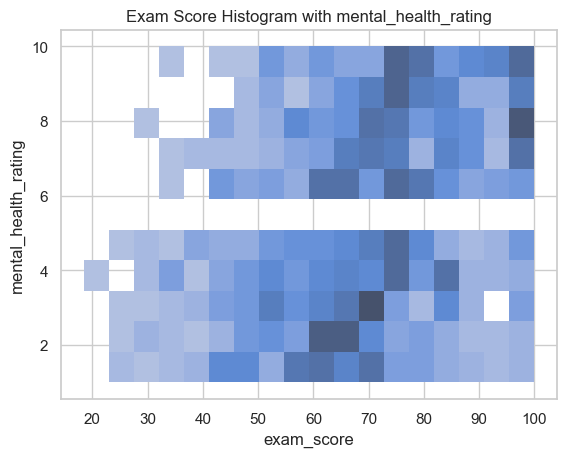

In [295]:
# For so many points, the charts aren't so easy to read
# That is why it can be beneficial to use histograms
from sklearn.preprocessing import LabelEncoder

cat_col = list(set(df.columns) - set(df_num.columns))
le = LabelEncoder()
df_tr = df.copy()
for q in cat_col:
    df_tr[q] = le.fit_transform(df_tr[q])
df_tr = pd.DataFrame(df_tr, columns=df.columns)
for q in ["study_hours_per_day", "social_media_hours", "netflix_hours", "mental_health_rating"]:
    sns.histplot(x="exam_score", y=q, data=df_tr)
    plt.title("Exam Score Histogram with {}".format(q))
    plt.show()

In [296]:
df_tr['mental_health_rating'].value_counts().sort_index()
# the empty line is just a bug with the chart

mental_health_rating
1     102
2      94
3     105
4     110
5      99
6     108
7      91
8     105
9      87
10     99
Name: count, dtype: int64

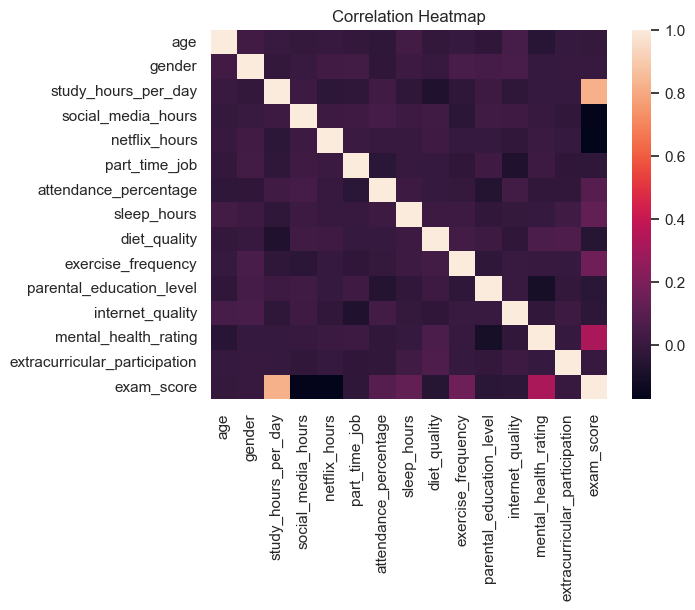

In [297]:
# Let's check the correlation between each pair of attributes
sns.heatmap(df_tr.corr())
plt.title("Correlation Heatmap")
plt.show()

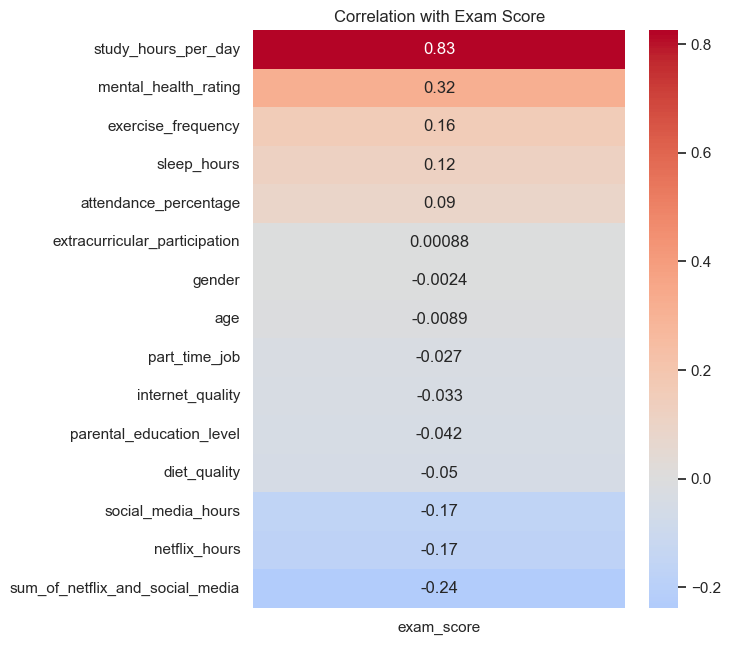

In [298]:
# Let's now examine the correlations with exam score more deeply
# We summed netflix hours and social media hours as both of them are treated similarly (as waste of time by majority of parents)
df_tr['sum_of_netflix_and_social_media'] = df_tr['social_media_hours'] + df_tr['netflix_hours']
corr = df_tr.corr()
exam_corr = corr[['exam_score']].sort_values(by='exam_score', ascending=False)
exam_corr = exam_corr.drop('exam_score')
plt.figure(figsize=(6, len(exam_corr) * 0.5))
sns.heatmap(exam_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation with Exam Score')
plt.show()

The results only confirm the conclusions we obtained using scatter plots.

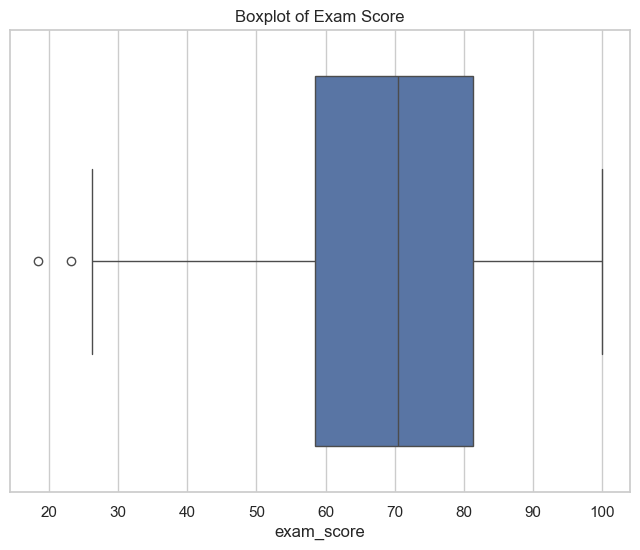

In [299]:
# Boxplot for exam scores
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['exam_score'])
plt.title("Boxplot of Exam Score")
plt.show()

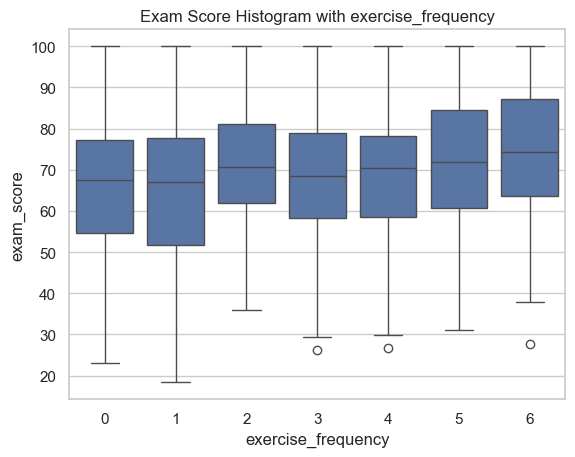

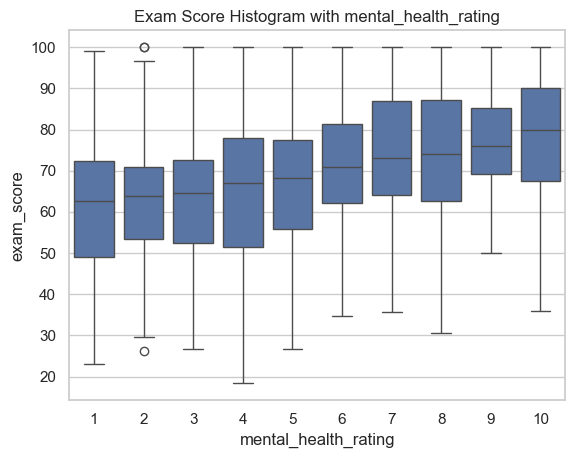

In [300]:
# Boxplotes of ordinal categorical attributes with the highest correlation vs exam_score
# The trend is obvious
for q in ["exercise_frequency", "mental_health_rating"]:
    sns.boxplot(x=q, y="exam_score", data=df_tr)
    plt.title("Exam Score Histogram with {}".format(q))
    plt.show()

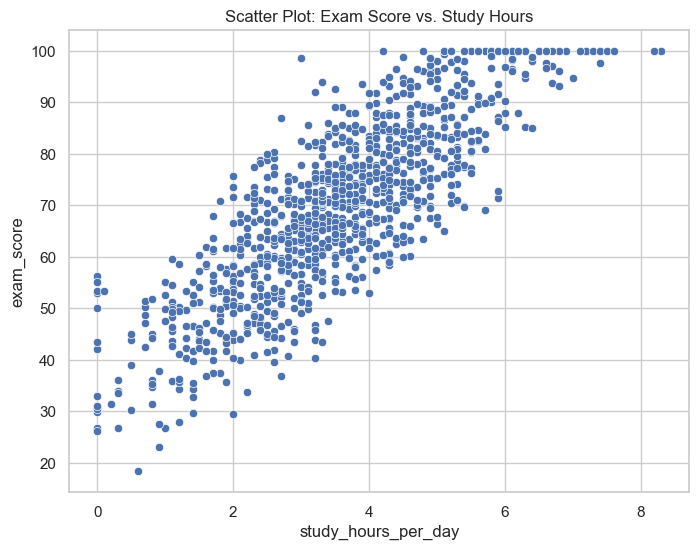

In [301]:
# Scatter plot between the most correlated attributes
plt.figure(figsize=(8, 6))
sns.scatterplot(x='study_hours_per_day', y='exam_score', data=df)
plt.title("Scatter Plot: Exam Score vs. Study Hours")
plt.show()

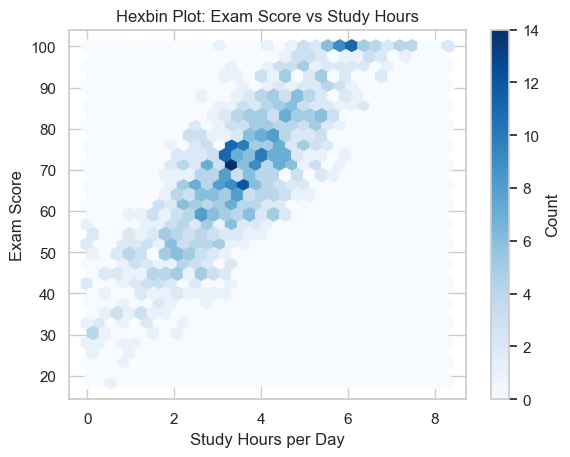

In [302]:
# Hexbin plot between the most correlated attributes
# It can be a better choice in this context as there is a lof of data points
plt.hexbin(df['study_hours_per_day'], df['exam_score'], gridsize=30, cmap='Blues')
plt.colorbar(label='Count')
plt.xlabel('Study Hours per Day')
plt.ylabel('Exam Score')
plt.title('Hexbin Plot: Exam Score vs Study Hours')
plt.show()


<Axes: xlabel='study_hours_per_day', ylabel='exam_score'>

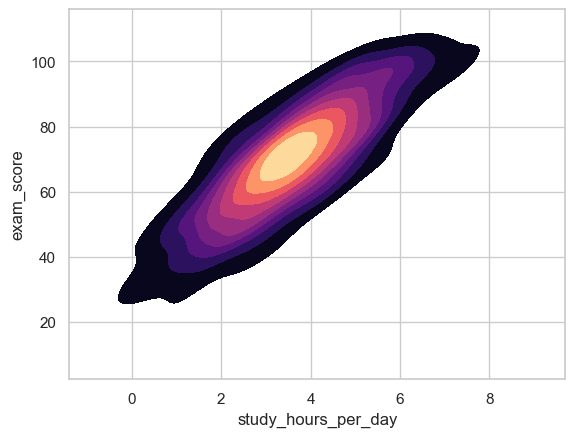

In [303]:
sns.kdeplot(data=df, x='study_hours_per_day', y='exam_score', fill=True, cmap='magma')

In [304]:
# Examining correlation one more time but only for numerical attributes with the 'original' dataframe
df_num.corr()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
age,1.000000,0.003971,-0.009151,-0.001174,-0.026055,0.037482,-0.003836,-0.045101,-0.008907
study_hours_per_day,0.003971,1.000000,0.020282,-0.031158,0.026264,-0.027757,-0.028701,-0.003768,0.825419
social_media_hours,-0.009151,0.020282,1.000000,0.011477,0.040479,0.018236,-0.037319,0.001496,-0.166733
netflix_hours,-0.001174,-0.031158,0.011477,1.000000,-0.002092,-0.000935,-0.006448,0.008034,-0.171779
attendance_percentage,-0.026055,0.026264,0.040479,-0.002092,1.000000,0.013756,-0.007857,-0.018745,0.089836
sleep_hours,0.037482,-0.027757,0.018236,-0.000935,0.013756,1.000000,0.019769,-0.006508,0.121683
exercise_frequency,-0.003836,-0.028701,-0.037319,-0.006448,-0.007857,0.019769,1.000000,-0.000242,0.160107
mental_health_rating,-0.045101,-0.003768,0.001496,0.008034,-0.018745,-0.006508,-0.000242,1.000000,0.321523
exam_score,-0.008907,0.825419,-0.166733,-0.171779,0.089836,0.121683,0.160107,0.321523,1.000000


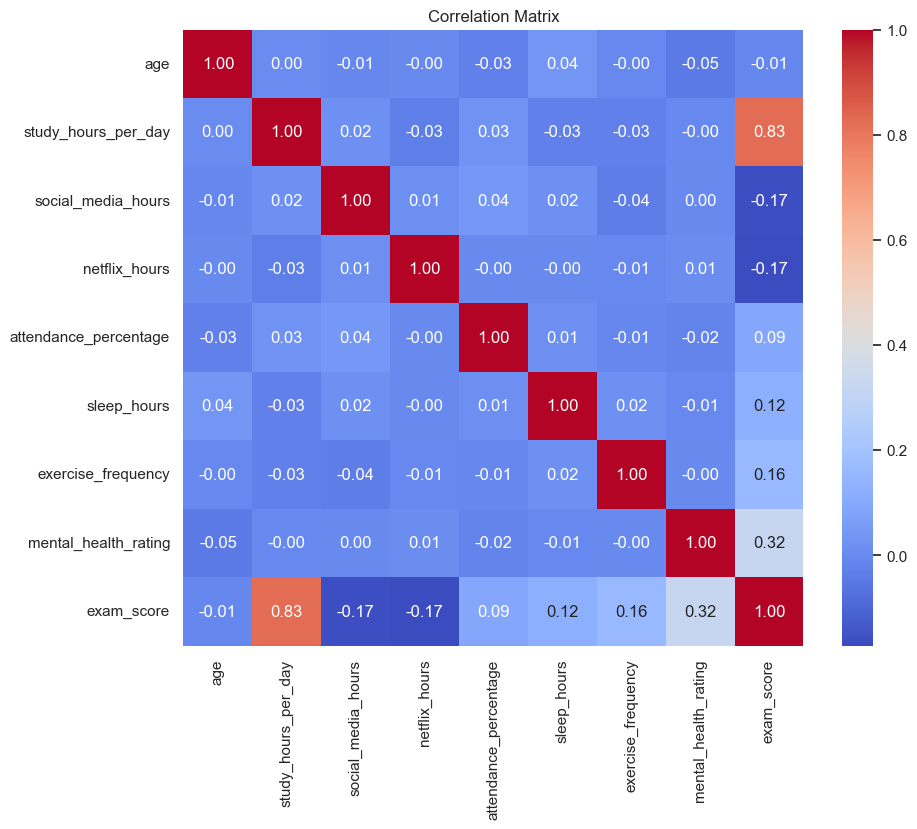

In [305]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df_num.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [306]:
df_num_corr = df_num.corr()['exam_score'][:-1]
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with Exam Score:\n{}".format(len(golden_features_list), golden_features_list))

There is 1 strongly correlated values with Exam Score:
study_hours_per_day    0.825419
Name: exam_score, dtype: float64


<Axes: >

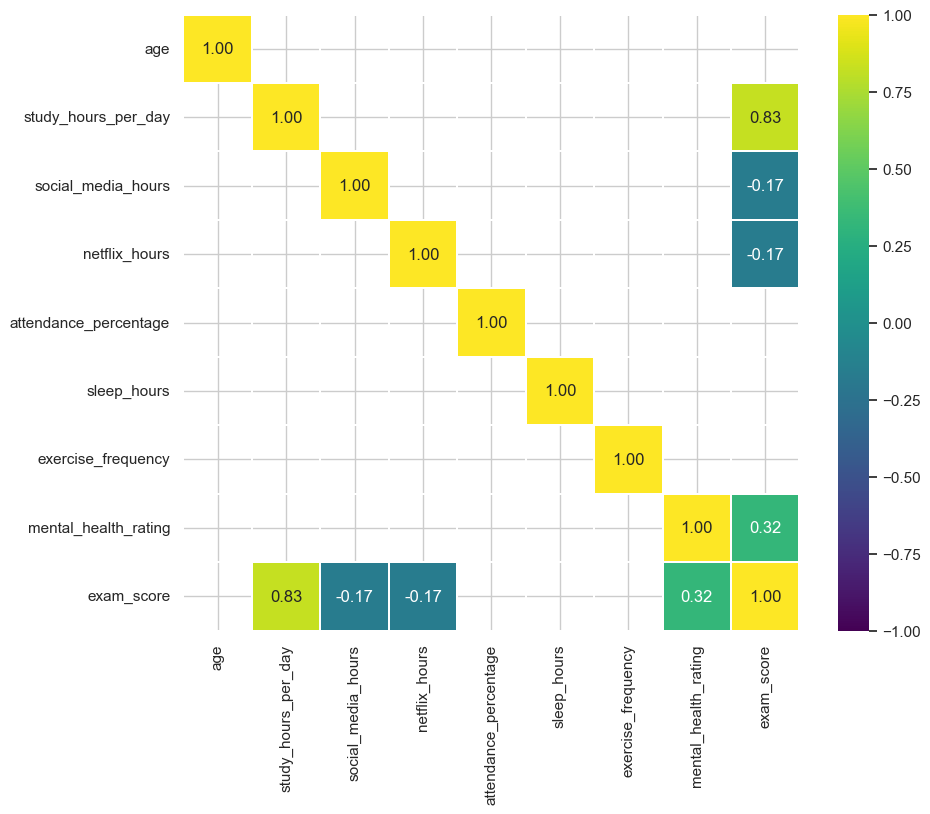

In [307]:
corr = df_num.corr()
plt.figure(figsize=(10, 8))

sns.heatmap(corr[(corr >= 0.2) | (corr <= -0.15)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, fmt=".2f", square=True)


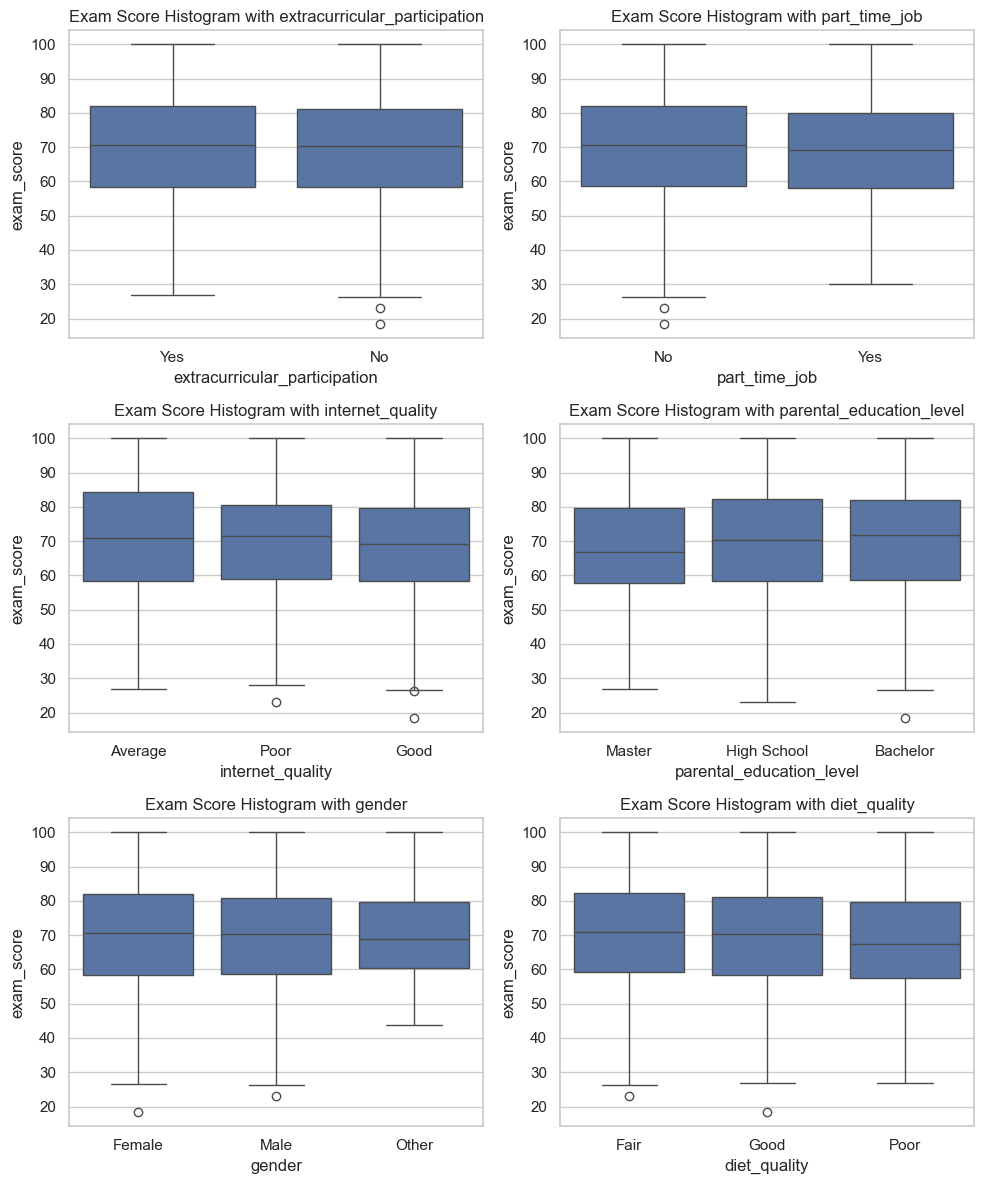

In [308]:
# Boxplots for categorical columns (separate boxplot for each value group)
n = len(cat_col)
n_cols = 2
n_rows = (n + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
axes = axes.flatten()
for ax, q in zip(axes, cat_col):
    sns.boxplot(x=q, y="exam_score", data=df, ax=ax)
    ax.set_title("Exam Score Histogram with {}".format(q))
plt.tight_layout()

Almost no correlation

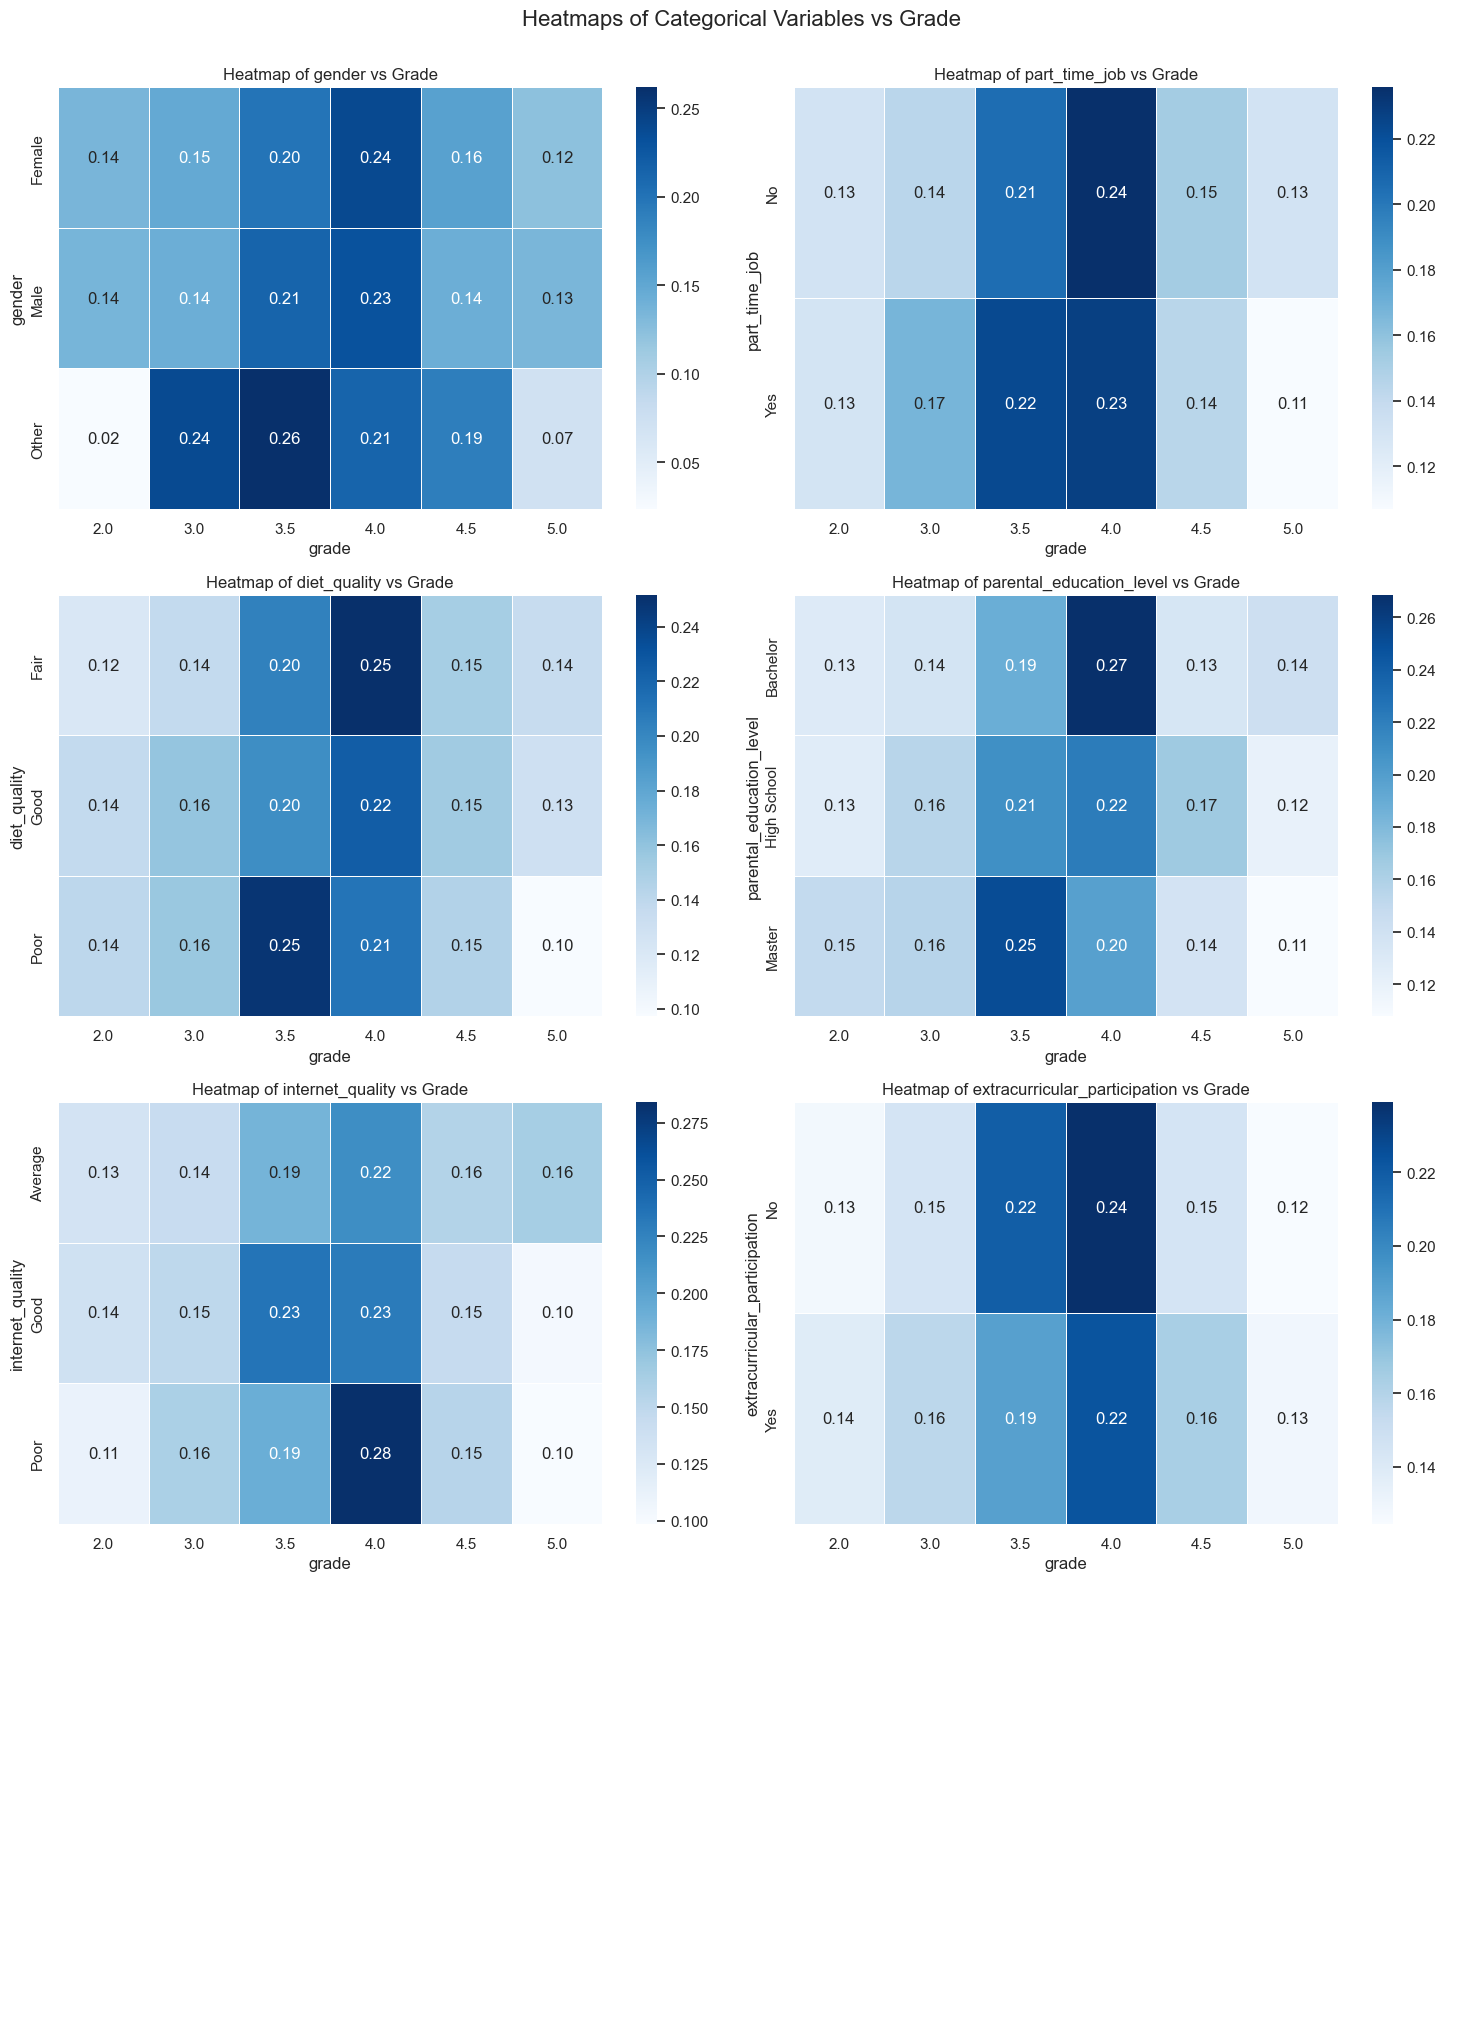

In [309]:
# For the analysis of categorical value, we transform exam score from numerical to categorical value. If the score is higher than 50 then the exam is passed (Yes), no otherwise.
df['grade'] = df['exam_score'].apply(lambda x:
    2 if x < 50 else
    3 if x < 60 else
    3.5 if x < 70 else
    4 if x < 80 else
    4.5 if x < 90 else
    5
)

categorical_columns = [col for col in categorical_columns if col != 'grade']

fig, axes = plt.subplots(nrows=(len(categorical_columns) // 2) + 1, ncols=2, figsize=(15, 5 * ((len(categorical_columns) // 2) + 1)))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    ax = axes[i]
    contingency = pd.crosstab(df[col], df['grade'], normalize='index')
    sns.heatmap(contingency, annot=True, cmap="Blues", fmt='.2f', cbar=True, ax=ax, linewidths=0.5)
    ax.set_title(f"Heatmap of {col} vs Grade")
    ax.set_ylabel(col)

for i in range(len(categorical_columns), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.suptitle("Heatmaps of Categorical Variables vs Grade", fontsize=16, y=1.02)
plt.show()


 In categorical attributes, there are no major differences between how certain values affect score at the exam. Only one value - Other, for sex behaves differently, where 98% of data has a positive exam result. However, this can be biased as there are little data with such sex.

In [310]:
df['grade'].value_counts()


grade
4.0    234
3.5    209
4.5    151
3.0    149
2.0    131
5.0    126
Name: count, dtype: int64

C:\Users\Jakub\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Jakub\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Jakub\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Jakub\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_mo


Logistic Regression:
Test Accuracy: 0.5960
Cross-Val Accuracy: 0.6190 ± 0.0220

Classification Report:
              precision    recall  f1-score   support

           2       0.76      0.76      0.76        33
           3       0.43      0.34      0.38        38
         3.5       0.49      0.56      0.52        52
           4       0.63      0.66      0.64        58
         4.5       0.59      0.50      0.54        38
           5       0.69      0.81      0.75        31

    accuracy                           0.60       250
   macro avg       0.60      0.60      0.60       250
weighted avg       0.59      0.60      0.59       250



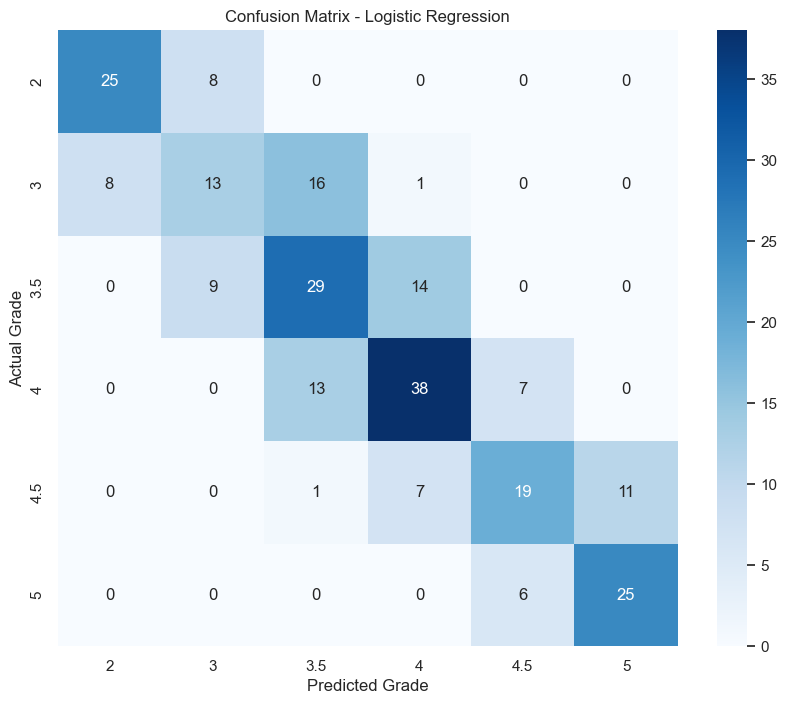


Decision Tree:
Test Accuracy: 0.4320
Cross-Val Accuracy: 0.4280 ± 0.0423

Classification Report:
              precision    recall  f1-score   support

           2       0.71      0.61      0.66        33
           3       0.37      0.37      0.37        38
         3.5       0.36      0.38      0.37        52
           4       0.37      0.38      0.38        58
         4.5       0.36      0.32      0.34        38
           5       0.56      0.65      0.60        31

    accuracy                           0.43       250
   macro avg       0.46      0.45      0.45       250
weighted avg       0.44      0.43      0.43       250



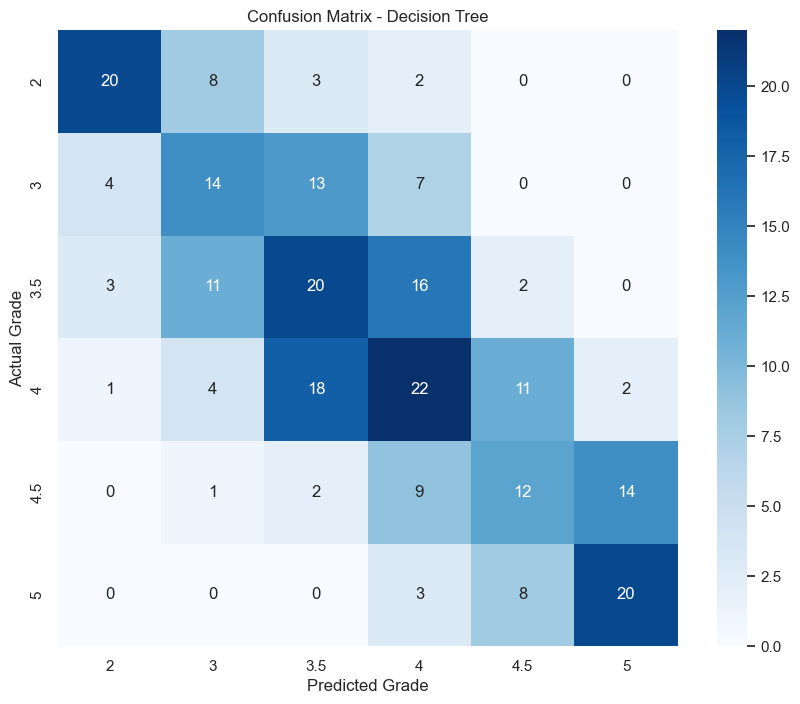


Random Forest:
Test Accuracy: 0.4920
Cross-Val Accuracy: 0.4970 ± 0.0439

Classification Report:
              precision    recall  f1-score   support

           2       0.71      0.73      0.72        33
           3       0.46      0.29      0.35        38
         3.5       0.37      0.42      0.40        52
           4       0.41      0.57      0.48        58
         4.5       0.45      0.26      0.33        38
           5       0.74      0.74      0.74        31

    accuracy                           0.49       250
   macro avg       0.52      0.50      0.50       250
weighted avg       0.50      0.49      0.48       250



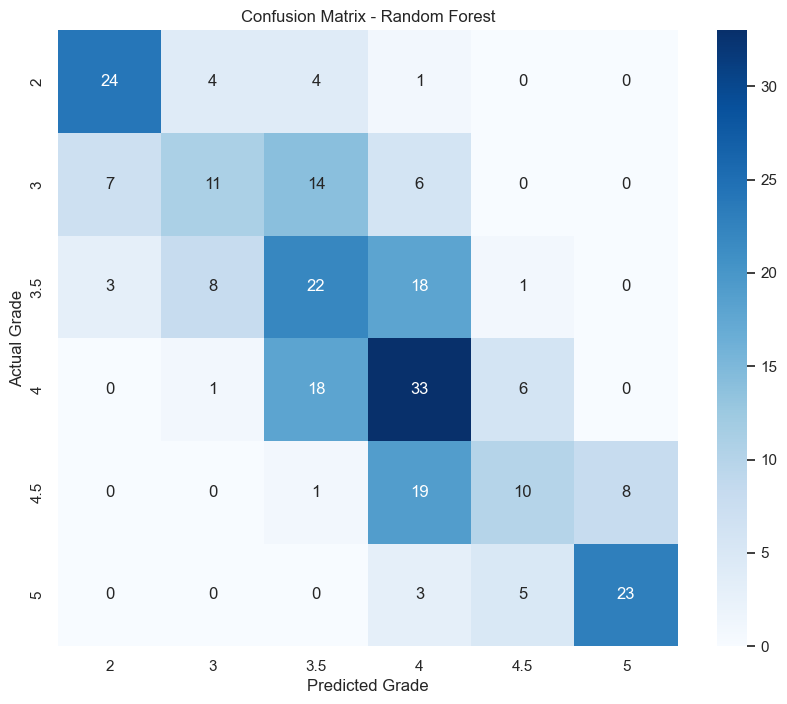

C:\Users\Jakub\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Jakub\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Jakub\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i


Naive Bayes:
Test Accuracy: 0.2400
Cross-Val Accuracy: 0.3900 ± 0.0831

Classification Report:
              precision    recall  f1-score   support

           2       0.17      0.97      0.29        33
           3       0.20      0.05      0.08        38
         3.5       0.00      0.00      0.00        52
           4       0.00      0.00      0.00        58
         4.5       0.33      0.08      0.13        38
           5       0.77      0.74      0.75        31

    accuracy                           0.24       250
   macro avg       0.24      0.31      0.21       250
weighted avg       0.20      0.24      0.16       250



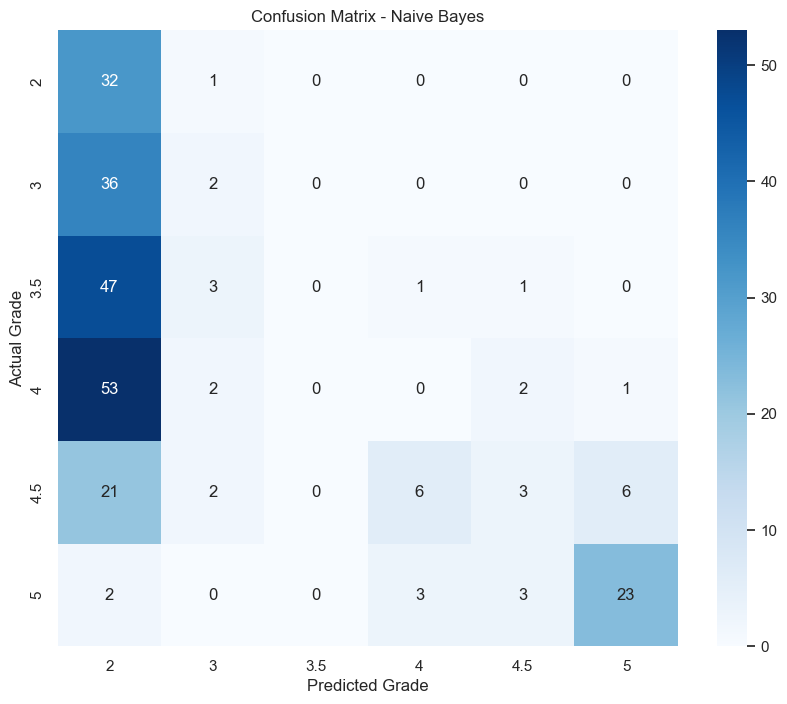

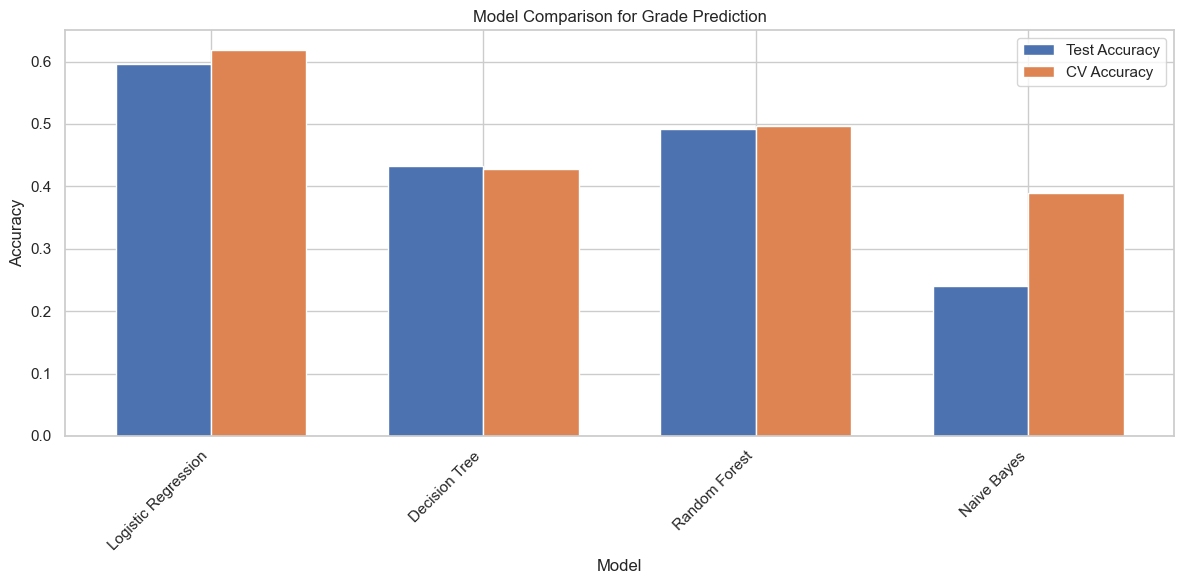

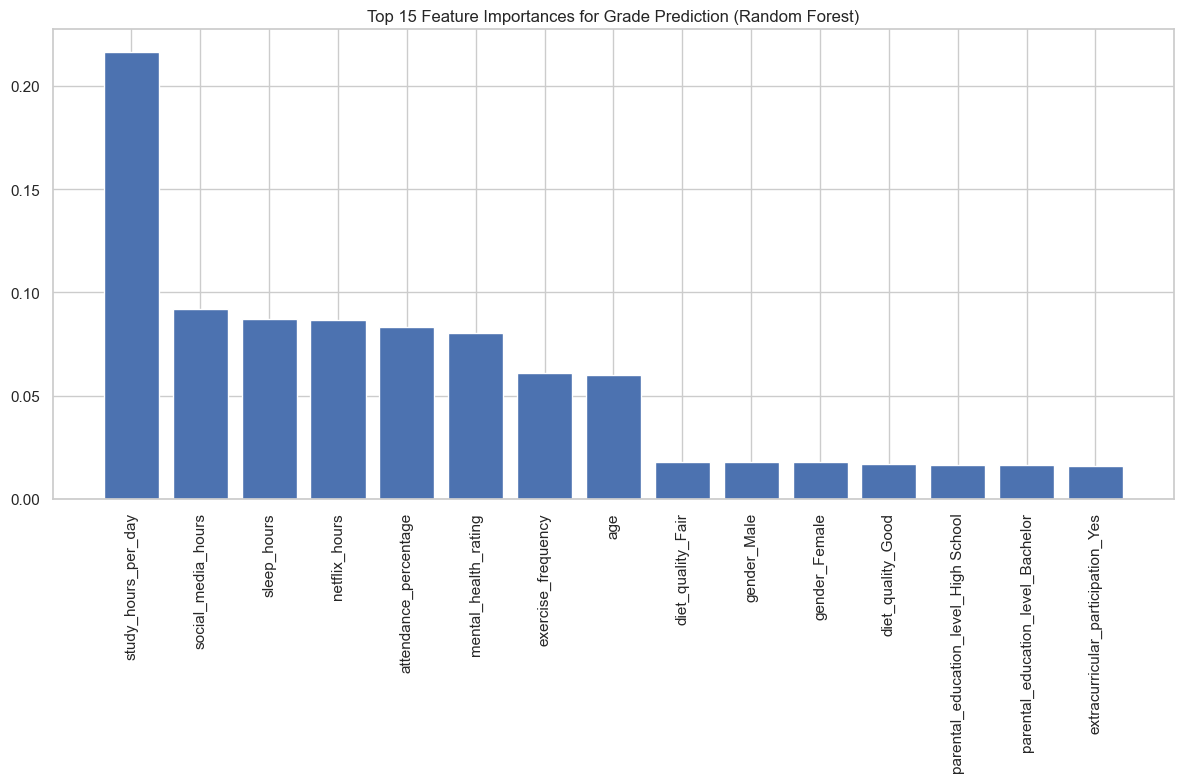

In [311]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Create grade column based on exam scores with the new scale, as strings
df['grade'] = pd.cut(
    df['exam_score'],
    bins=[0, 50, 60, 70, 80, 90, 100],
    labels=["2", "3", "3.5", "4", "4.5", "5"],
    include_lowest=True
)

# Prepare the data
X = df.drop(['exam_score', 'grade'], axis=1)
y = df['grade']  # Target is now multiclass grades as strings

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Define classification models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Naive Bayes": GaussianNB()
}

# Dictionary to store results
results = {}
cv_scores = {}
pipelines = {}

# Train and evaluate models
for name, model in models.items():
    # Create pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', model)])

    # Fit pipeline
    pipeline.fit(X_train, y_train)
    pipelines[name] = pipeline

    # Predictions
    y_pred = pipeline.predict(X_test)

    # Store results
    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'report': classification_report(y_test, y_pred, output_dict=True)
    }

    # Cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_score = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')
    cv_scores[name] = {
        'mean': cv_score.mean(),
        'std': cv_score.std()
    }

    # Print results
    print(f"\n{name}:")
    print(f"Test Accuracy: {results[name]['accuracy']:.4f}")
    print(f"Cross-Val Accuracy: {cv_scores[name]['mean']:.4f} ± {cv_scores[name]['std']:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["2", "3", "3.5", "4", "4.5", "5"],
                yticklabels=["2", "3", "3.5", "4", "4.5", "5"])
    plt.ylabel('Actual Grade')
    plt.xlabel('Predicted Grade')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

# Compare model performance
plt.figure(figsize=(12, 6))
accuracy_scores = [results[name]['accuracy'] for name in models.keys()]
cv_accuracy_scores = [cv_scores[name]['mean'] for name in models.keys()]
model_names = list(models.keys())

x = np.arange(len(model_names))
width = 0.35

plt.bar(x - width/2, accuracy_scores, width, label='Test Accuracy')
plt.bar(x + width/2, cv_accuracy_scores, width, label='CV Accuracy')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison for Grade Prediction')
plt.xticks(x, model_names, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Feature importance for Random Forest
if "Random Forest" in pipelines:
    rf_pipeline = pipelines["Random Forest"]
    rf_model = rf_pipeline.named_steps['classifier']

    # Get feature names after preprocessing
    preprocessor = rf_pipeline.named_steps['preprocessor']

    # Get one-hot encoded feature names
    ohe = preprocessor.transformers_[1][1]
    cat_features = ohe.get_feature_names_out(categorical_cols)

    # All feature names after preprocessing
    feature_names = numerical_cols + list(cat_features)

    # Get feature importances
    importances = rf_model.feature_importances_

    # Sort features by importance
    indices = np.argsort(importances)[::-1]

    # Plot top 15 features
    plt.figure(figsize=(12, 8))
    plt.title("Top 15 Feature Importances for Grade Prediction (Random Forest)")
    plt.bar(range(min(15, len(indices))), importances[indices[:15]], align="center")
    plt.xticks(range(min(15, len(indices))), [feature_names[i] for i in indices[:15]], rotation=90)
    plt.tight_layout()
    plt.show()